In [1]:
import scanpy as sc
import scvi
from matplotlib import rcParams
import matplotlib.pyplot as plt

folder_path = "C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/"

# Load data

In [2]:
# Read in the data
adata = sc.read(folder_path + "adata_scVI.h5ad")
model = scvi.model.SCVI.load(folder_path + "model/", adata)

INFO     File C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/model/model.pt already downloaded         


In [3]:
# Clustering
sc.tl.leiden(adata, resolution=1)

C:\Users\heung\AppData\Local\Temp\ipykernel_22972\1438560500.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1)


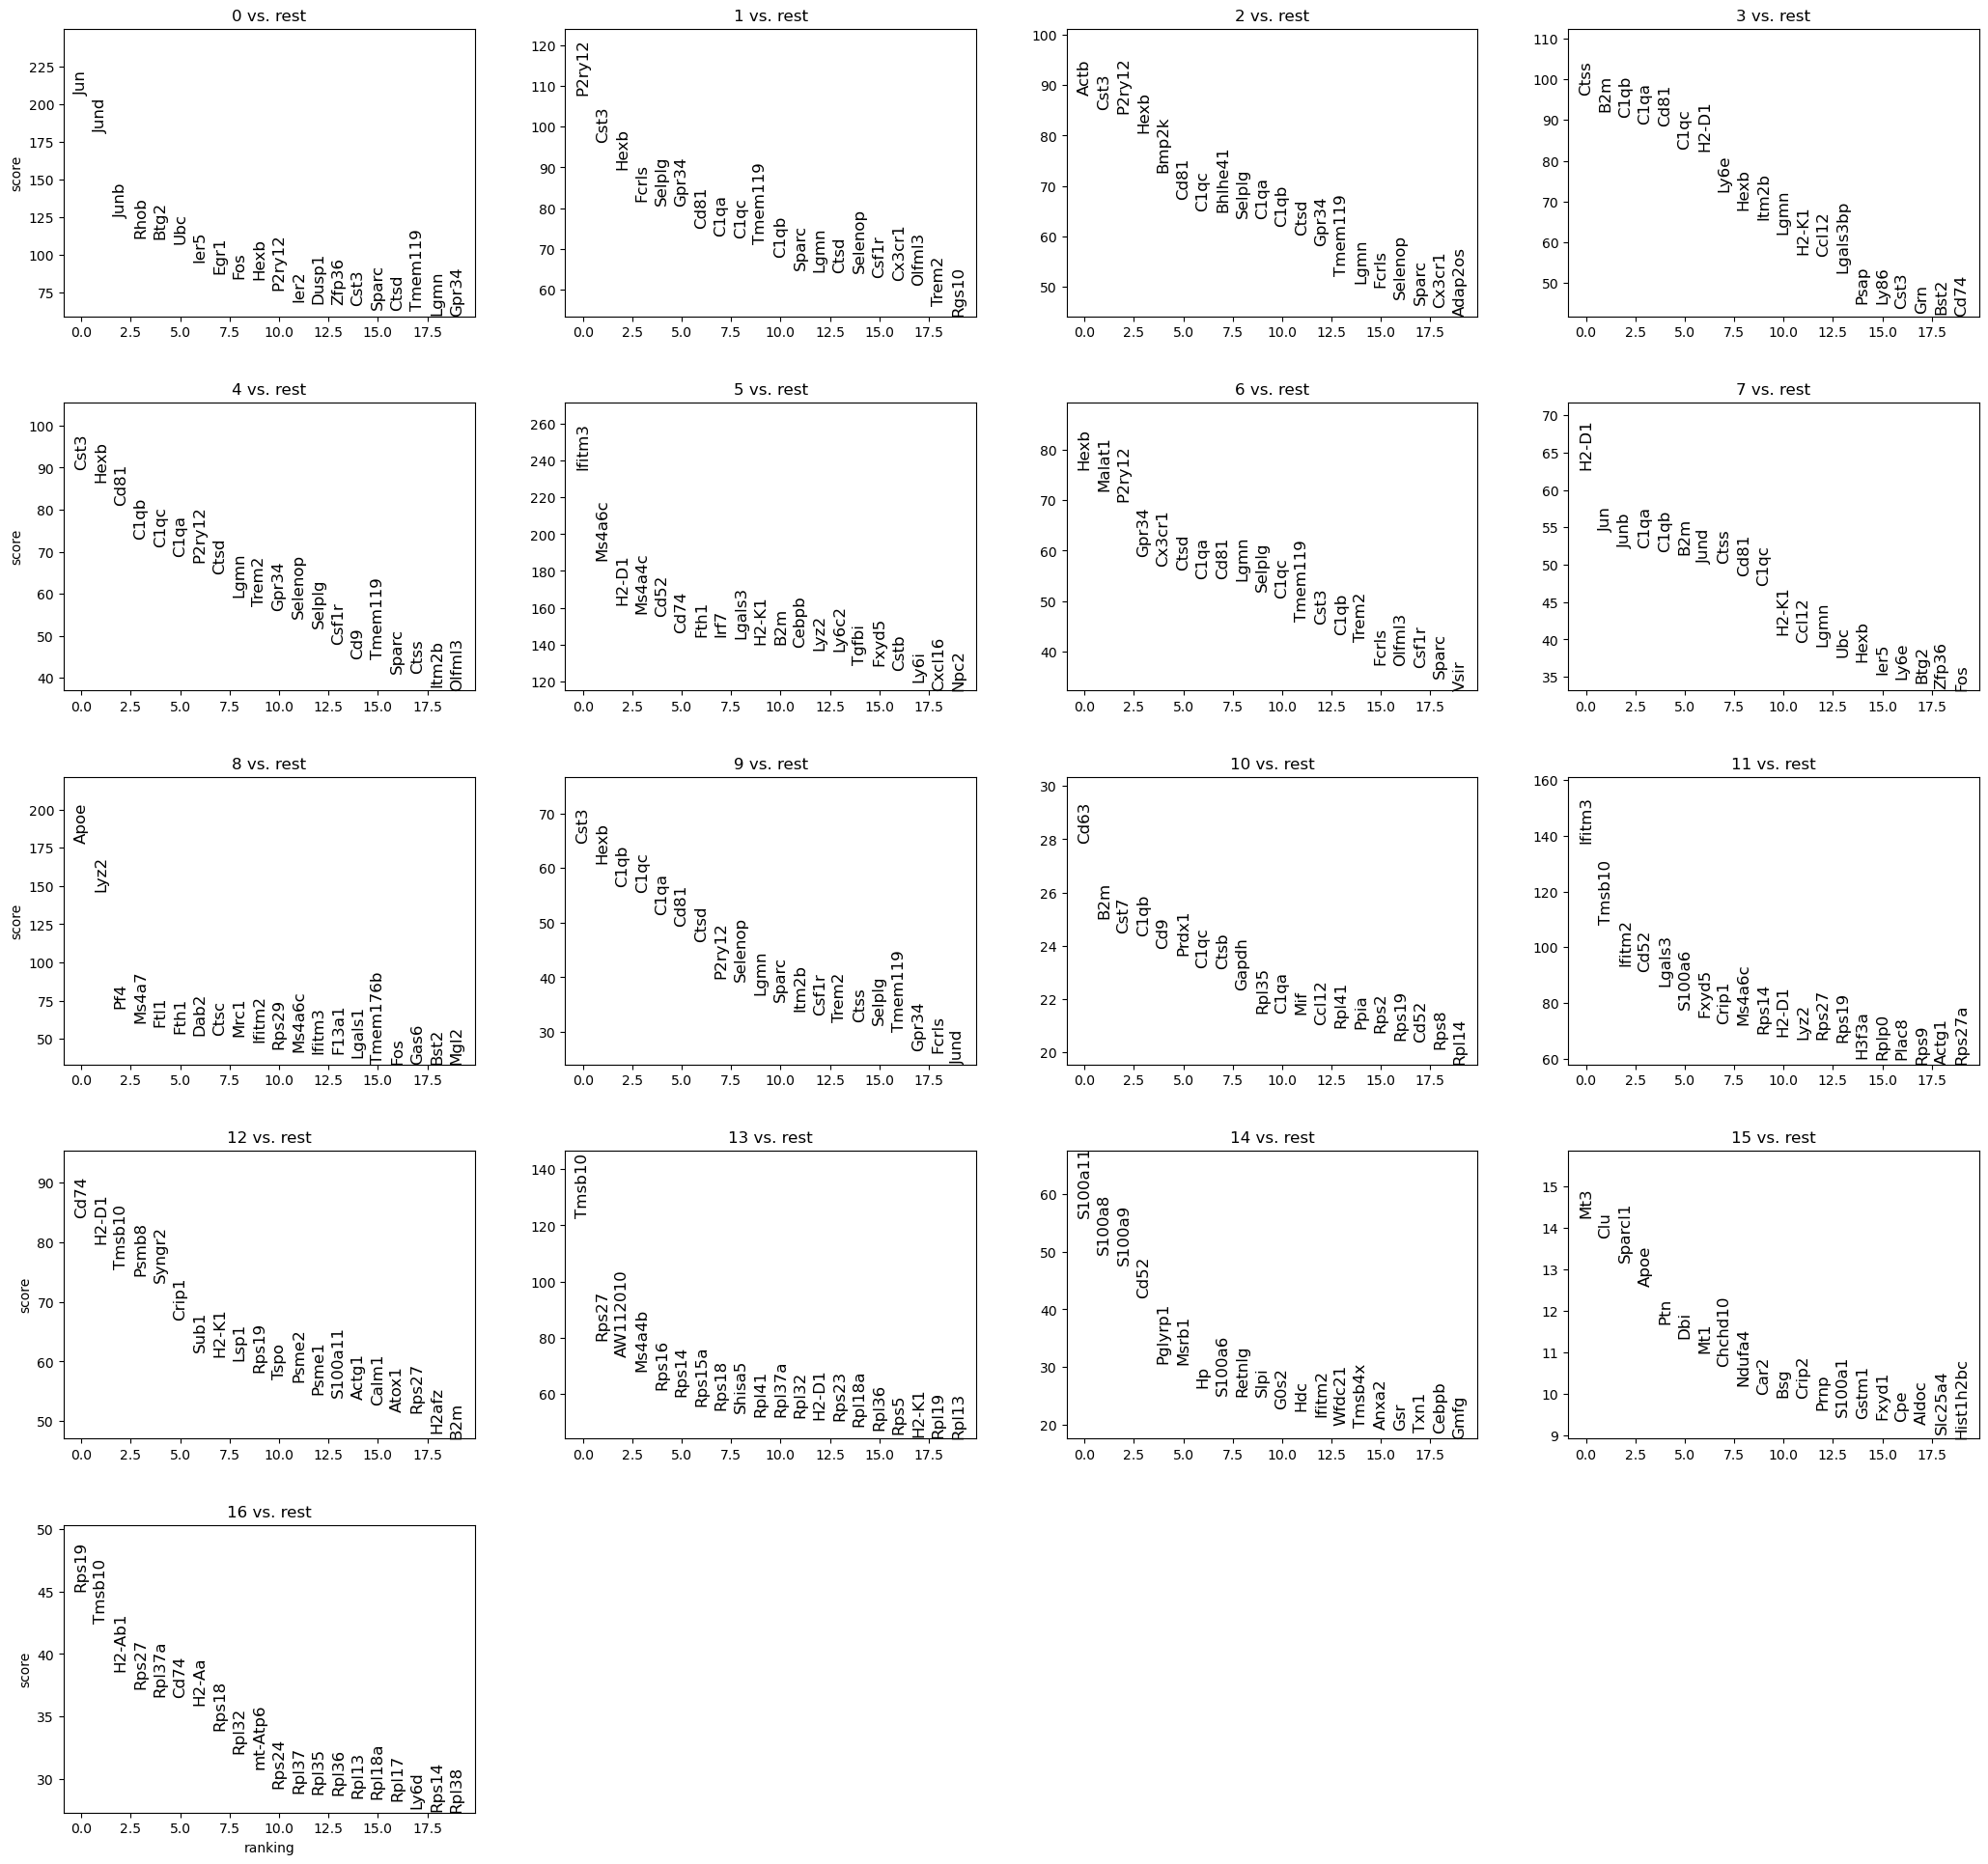

In [4]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes = 20, sharey = False, fontsize = 12)

# Finding markers

In [5]:
# making markers
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]

In [6]:
# making markers_scvi
# 18개 cluster DEG 찾는데 약 3분 소요
markers_scvi = model.differential_expression(groupby = 'leiden')

# markers_scvi filtering
# FDR < 0.05 and logFC > 0.5
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

DE...: 100%|██████████| 17/17 [02:34<00:00,  9.11s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Jun,0.9768,0.0232,3.740129,6.961777e-03,1.242247e-03,0.0,0.25,3.173820,3.344379,1.642619,...,16.374758,2.844298,0.994934,0.603914,76.488426,11.896955,True,0 vs Rest,0,Rest
Jund,0.9740,0.0260,3.623314,5.421839e-03,1.271927e-03,0.0,0.25,2.602198,2.701489,1.406610,...,12.510904,3.011003,0.994410,0.692335,58.200848,12.402237,True,0 vs Rest,0,Rest
Egr1,0.9732,0.0268,3.592187,9.774847e-04,1.977552e-04,0.0,0.25,3.062806,3.157644,1.717750,...,1.962493,0.284794,0.703529,0.135676,8.912484,1.088825,True,0 vs Rest,0,Rest
Ier2,0.9720,0.0280,3.547151,1.341472e-03,2.965207e-04,0.0,0.25,2.968505,3.048509,1.938545,...,2.922683,0.715871,0.690077,0.257175,12.948829,2.560357,True,0 vs Rest,0,Rest
Gm26802,0.9710,0.0290,3.511030,1.319817e-05,2.388678e-06,0.0,0.25,3.124218,3.120218,2.108289,...,0.011530,0.001300,0.009783,0.001110,0.049661,0.004240,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm35206,0.8986,0.1014,2.181765,2.821978e-06,1.357293e-06,0.0,0.25,1.267823,1.147422,1.549784,...,0.007692,0.000808,0.007692,0.000808,0.018104,0.003848,True,16 vs Rest,16,Rest
Gm16211,0.8984,0.1016,2.179572,6.160278e-07,4.009840e-07,0.0,0.25,0.671775,0.807568,2.006287,...,0.000000,0.000108,0.000000,0.000108,0.000000,0.000636,True,16 vs Rest,16,Rest
Olig1,0.8984,0.1016,2.179572,4.075970e-06,2.559593e-06,0.0,0.25,0.768051,0.783986,2.152832,...,0.000000,0.002316,0.000000,0.001939,0.000000,0.009031,True,16 vs Rest,16,Rest
2300009A05Rik,0.8984,0.1016,2.179572,3.891455e-05,2.068694e-05,0.0,0.25,0.965964,0.975301,0.884977,...,0.076923,0.047489,0.069231,0.045360,0.406618,0.206201,True,16 vs Rest,16,Rest


FDR (false discovery rate)\
FDR < 0.005 :위양성의 비율이 0.05 미만이다.\
LFC: log fold change

# Visualizing UMAP cluster

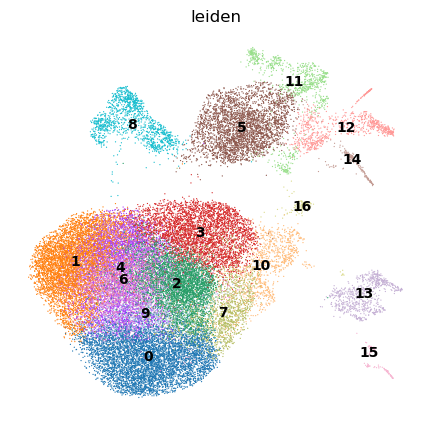

In [24]:
rcParams['figure.figsize'] = (5.3, 5)

sc.pl.umap(
    adata,
    color = ['leiden'],
    frameon = False,
    legend_loc = 'on data'
)

# Cell type annotation

In [11]:
for i in range(17):
    print(f'"{i}": "", ')

"0": "", 
"1": "", 
"2": "", 
"3": "", 
"4": "", 
"5": "", 
"6": "", 
"7": "", 
"8": "", 
"9": "", 
"10": "", 
"11": "", 
"12": "", 
"13": "", 
"14": "", 
"15": "", 
"16": "", 


In [30]:
cell_type = {
"0": "Microglia", 
"1": "Microglia", 
"2": "Microglia", 
"3": "Activated microglia", 
"4": "Microglia", 
"5": "Mo/Mp", 
"6": "Microglia", 
"7": "Activated microglia", 
"8": "BAM", 
"9": "Microglia", 
"10": "Activated microglia", 
"11": "Mo/Mp", 
"12": "Mo/Mp", 
"13": "T cells", 
"14": "Mo/Mp", 
"15": "Etc.", 
"16": "B cells", 
}

## Gene expression in feature plot

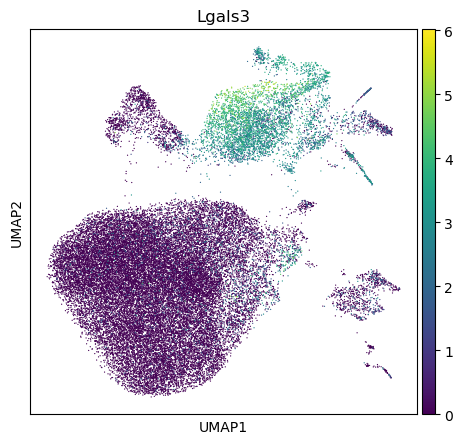

In [31]:
rcParams['figure.figsize'] = (5.5, 5)

sc.pl.umap(
    adata,
    color = ['Lgals3'],
    # frameon = False,
    # layer = 'scvi_normalized',
    color_map = 'viridis',
)

## Gene expression by violin plot

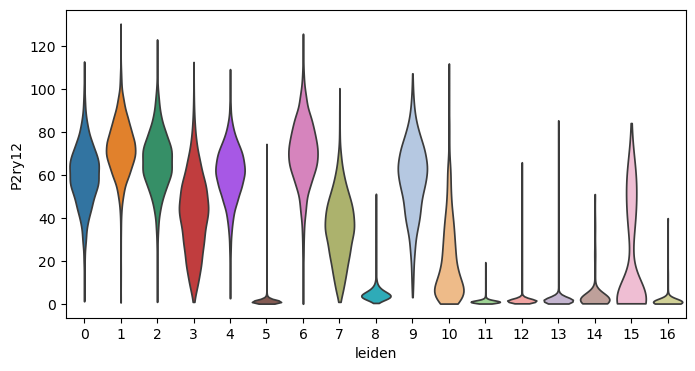

In [36]:
fig, ax = plt.subplots(figsize = (8, 4))

sc.pl.violin(
    adata,
    keys = ['P2ry12'],
    groupby = 'leiden',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
)

## Search cluster by gene name

In [17]:
# 유전자를 입력하면 높게 발현하는 cluster를 보여줌
markers[markers.names == 'P2ry12']

,group,names,scores,logfoldchanges,pvals,pvals_adj
10,0,P2ry12,76.453651,1.344959,0.000000e+00,0.000000e+00
16739,1,P2ry12,107.753571,1.758570,0.000000e+00,0.000000e+00
33480,2,P2ry12,84.394882,1.506545,0.000000e+00,0.000000e+00
50287,3,P2ry12,21.033997,0.503021,1.283371e-95,1.032805e-93
66962,4,P2ry12,67.628792,1.274286,0.000000e+00,0.000000e+00
100436,6,P2ry12,69.706474,1.469680,0.000000e+00,0.000000e+00
150658,9,P2ry12,39.839783,1.153749,6.665622e-249,3.281642e-246


## Search genes highly expressed in the cluster

In [29]:
# cluster를 입력하면 높게 발현하는 유전자를 보여줌
for item in markers_scvi[markers_scvi.group1 == '15'][0:10].index:   # 10 개 까지 보여줌
    print(item)

Ptn
St6galnac5
Cox7b2
Hes5
Sparcl1
S100a16
Fam181b
Slc25a34
Tspan15
Meis2


## Cell type 설정

In [37]:
# Assigning cell types
# adata obs에 cell_type column 추가
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs.head(5)

,sample,sex,condition,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type
AAACCTGAGAGGTTAT-1,f-ctrl-1,female,normal,988,1863.0,2.200752,5.797101,0,0,2,5.367686,Microglia
AAACCTGCAATGGATA-1,f-ctrl-1,female,normal,1681,3707.0,0.998112,6.986782,0,0,0,2.697599,Microglia
AAACCTGCACAGATTC-1,f-ctrl-1,female,normal,1220,2472.0,0.404531,9.061488,0,0,0,4.045308,Microglia
AAACGGGAGGTGACCA-1,f-ctrl-1,female,normal,978,2030.0,2.266010,8.374384,0,0,4,4.926108,Microglia
AAACGGGCATCGGACC-1,f-ctrl-1,female,normal,1095,2075.0,2.361446,8.192771,0,0,1,4.819277,Microglia


## Cell type 확인

### UMAP 확인

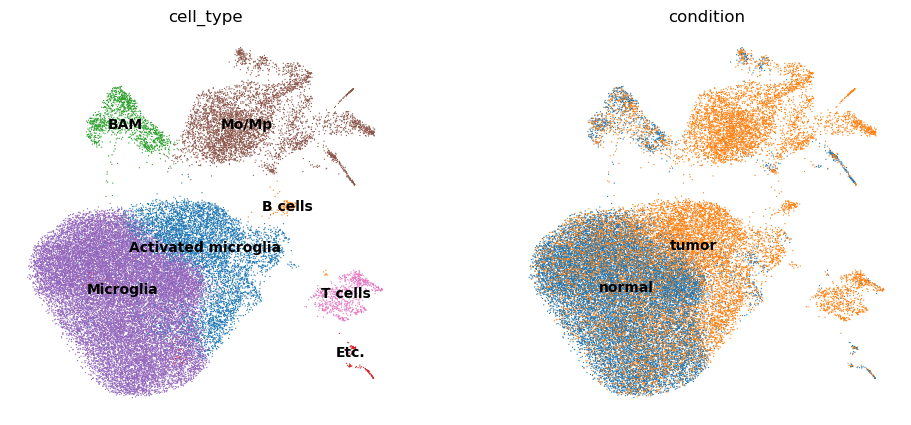

In [79]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['cell_type', 'condition'],
    frameon = False,
    legend_loc = 'on data',
    palette = sc.pl.palettes.vega_10
)

> tumor sample에서 activated microglia, Mo/Mp, B cells, and T cells가 증가하는 것이 확인됨. (논문과 같다)

### Violin plot gene expression 확인

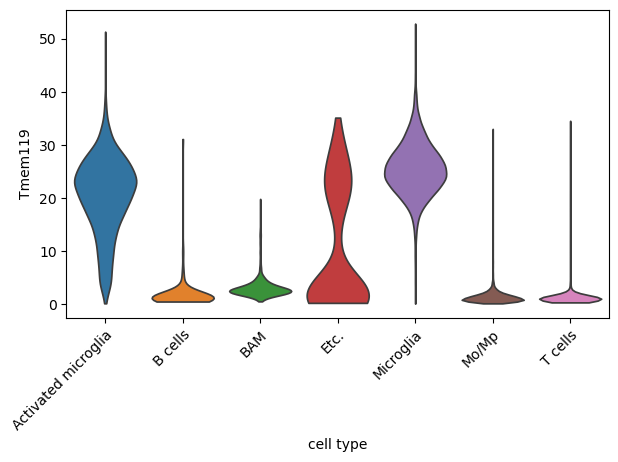

In [83]:
fig, ax = plt.subplots(figsize = (7, 4))

sc.pl.violin(
    adata,
    keys = ['Tmem119'],
    groupby = 'cell_type',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
    show = False
)

plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')   # x 축 레이블 회전
plt.show()

### Dot plot

In [87]:
marker_genes_dict = {
    'Microglia': ['P2ry12', 'Tmem119'],
    'Activated microglia' : ['H2-D1', 'H2-Aa'],
    'Mo/Mp' : ['Ly6i', 'Ly6c2'],
    'BAM' : ['Ms4a7', 'Mrc1'],
    'T cells' : ['Cd3e', 'Nkg7'],
    'B cells' : ['Cd19', 'Cd79b'],
    'Etc.' : ['Cox7b2', 'Serpinh1'],
}

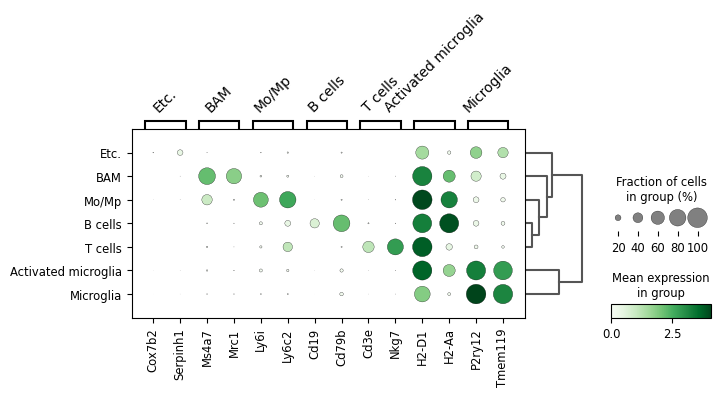

In [88]:
# sc.tl.dendrogram(adata, groupby = 'cell_type')    # dot plot 한번 그린 후 cell type annotation 바꾸면 이거 돌려줘야 함

sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby = 'cell_type',
    dendrogram = True,
    var_group_rotation = 45,
    cmap = 'Greens',
)

# Save

In [89]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

adata.write_h5ad(folder_path + "annotated.h5ad")
# 3,446,216 kb